<a href="https://colab.research.google.com/github/er-knight/using-python-for-research/blob/main/week-4-part-2/week-4-part-2-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Python for Research Homework: Week 4, Case Study 2**

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [3]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
bird_data = pd.read_csv("https://raw.githubusercontent.com/er-knight/using-python-for-research/main/week-4-part-2/bird-tracking.csv", index_col=0)
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### **Exercise 1**

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

**Instructions**
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [19]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = bird_data.groupby("bird_name")

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()

mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

### **Exercise 2**

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

**Instructions**
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [58]:
# Convert bird_data.date_time to the `pd.datetime` format.
bird_data.date_time = pd.to_datetime(bird_data.date_time)

# Create a new column of day of observation
bird_data["date"] = bird_data.date_time.dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = bird_data.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
mean_altitudes_perday.head()

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
Name: altitude, dtype: float64

What is the mean altitude of the birds on `2013-09-12`?  
Answer &rarr; 75.64609053497942

In [59]:
mean_altitudes_perday[datetime.date(2013, 9, 12)]

75.64609053497942

### **Exercise 3**

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

**Instructions**
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [72]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = bird_data.groupby(["bird_name", "date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()
mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

What is the mean altitude of the bird Eric on `2013-08-18`?  
Answer &rarr; 121.35365853658537 

In [73]:
mean_altitudes_perday["Eric"][datetime.date(2013, 8, 18)]

121.35365853658537

### **Exercise 4**

Great! Now find the average speed for each bird and day.

**Instructions**

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

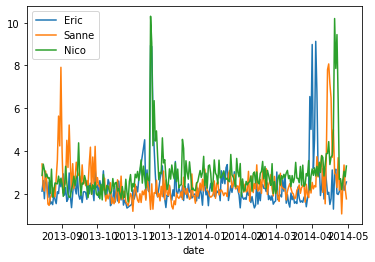

In [74]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()